<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/PDS_SI_B_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anggota Kelompok:
- Pamostang William Richard H. (175150400111030)
- Raden Febrian Adjie Pratama Putra (175150407111026)
- Yanuardi Santoso (175150400111016)

# Tujuan Bisnis:
- Menyajikan data rumah kepada pengguna dengan data yang relevan / penting bagi pengguna tersebut
- Mengelompokkan rumah beradasarkan Luas Bangunan & Luas Tanahnya agar mempermudah user untuk mencari rumah dengan dimensi yang sesuai dengan kebutuhan pengguna 
- Membantu pengguna dalam melakukan pemilihan yang sesuai dengan keinginannya terhadap penawaran rumah yang tersedia berdasarkan kategori rumah yang diberikan
- Menyimpan dan mengolah seluruh data rumah  yang dimiliki dan telah diolah agar lebih teratur dan berguna


Deskripsi:
Dengan adanya projek ini, harapannya kita bisa membantu pengguna dalam mencari rumah yang sesuai dengan kebutuhan dan keinginannya dengan cara mengkategorikan rumah yang ada sesuai dengan data kriteria rumah yang umumnya dicari dan tersedia.

# Pendekatan yang akan digunakan:
Dari data yang ada, kami menggunakan pendekatan berbasis kuantitatif. Pendekatan kuantitatif adalah pendekatan yang lebih menekankan pada banyak data yang ada dan diolah menggunakan metode statistika. Data yang kami gunakan ini berjumlah sekitar 14.000 masukan yang berasal dari berbagai responden yang berbeda-beda di beberapa lokasi yang tersebar, selain itu seluruh data yang ada tersebut juga dapat dikategorikan. Kami berharap dengan adanya penelitian ini, kami dapat mencari kolerasi antar data dan menjelaskannya.

# Pengumpulan Data:
- Menggunakan data set dari AtapData sebagai placeholder (https://atapdata.ai/dataset/256), dimana dataset tersebut berisi hasil survey dari penjual rumah mengenai properti yang ditawarkan.

# Pemahaman Data:
1. Data Rumah
- lastupdate: Tanggal update terakhir (bulan + tahun)
- longi & lati: Koordinat rumah
- city & area: Denah rumah
- region : 
- l_bangunan: Luas bangunan
- luas_tanah: Luas tanah properti
- shm: Jenis sertifikat rumah
- kamar_tur: Jhumlah kamar tidur di rumah
- kamar_mandi: Jumlah kamar mandi di rumah
- interior: Interior yang ada di rumah
- kondisi_bangunan: Kondisi bangunan rumah
- daya_listrik: Daya Listrik yang digunakan rumah
- lantai: Jumlah lantai bangunan
- carport: Jumlah carport
- arah bangunan : Arah menghadapnya bangunan
- tahun dibangun : Tahun rumah dibangun
- 24H security : Ketersediaan sistem keamanan 24 jam
- mini market : Ketersediaan mini market 
- jumlah telephone line : Banyaknya jalur telepon
- taman bermain : Ketersediaan taman bermain 
- dimensi tanah : Ukuran panjang dan lebar tanah 
- parkir : Ketersediaan tempat parkir umum 
- lintasan jogging : Ketersediaan jalur jogging
- kolam renang : Ketersediaan kolam renang
- club house : Ketersediaan club house 
- fitness center : Ketersediaan fitness center 
- CCTV : ketersediaan pengawasan melalui CCTV 
- binat : Apakah binatang peliharaan diperbolehkan
- ruang serbaguna : ketersediaan ruang serbaguna 
- Jenis properti : Keterangan jenis gedung/bangunan 
- Golf center : ketersediaan golf center 
- angsuran : biaya angsuran perbulan 
- p_15_ : Jumlah DP 15% saat melakukan KPR
- Pinjaman : Apakah penjual memperbolehkan KPR
- bebas banjir : keterangan bahwa rumah bebas dari wilayah banjir
- harga : harga rumah 

# Persiapan Data (Data Exploration):
- Melakukan data cleansing dengan membuang kolom-kolom yang menurut kami kurang 
relevan atau memiliki banyak ketidaklengkapan data sehingga informasinya tidak valid / kurang berguna untuk user (berdasarkan diskusi kami)
- Melakukan filtering data untuk hanya menampilkan data rumah biasa dan memisahkan dari input yang bersifat properti hunian lain seperti rusun atau apartemen
- Melakukan transformasi data untuk memudahkan proses pengolahan data. perubahan yang dilakukan diantaranya adalah merubah beberapa tipe data dari kolom luas tanah dan luas bangunan dari String menjati integer untuk memudahkan melakukan sorting dan klasifikasi data. Selain itu menambahkan kolom kategori dengan tipe data varchar yang yang merupakan tahapan clustering yang kami gunakan untuk mengelompokkan ke dalam kategori yang telah ditentukan.
- Mengitegrasikan data ke dalam dokumen Colab ini 

# Permodelan Data:

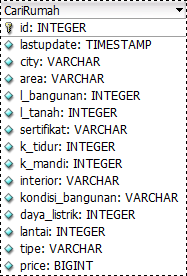

Proses permodelan data yaitu suatu proses untuk mendefinisikan serta menganalisis kebutuhan data yang diperlukan dalam mendukung suatu proses dalam sistem. Permodelan data yang akan dilakukan dalam penelitian ini yaitu dengan menggunakan Unified Modeling Language (UML)

# Klasifikasi Data 
Karena banyaknya data yang null dan tidak valid, klasifikasi dari data rumah yang didapat didasarkan dari luas tanah dan luas bangunan.

Tipe I -> Luas Bangunan 90 kebawah dan Luas Tanah 60 kebawah


Tipe II -> Luas Bangunan diantara 90 dan 120 dan Luas Tanah diantara 60 dan 90

Tipe III -> Luas Bangunan diantara 120 dan 150 dan Luas Tanah diantara 90 dan 120

Tipe IV -> Luas Bangunan diatas 150 dan Luas Tanah diatas 120

# CODING

In [ ]:
# Dataset Import
from google.colab import files
uploaded = files.upload()

Saving fp_dataset_FINAL.csv to fp_dataset_FINAL (1).csv


In [ ]:
# Importing Libraries and Utility
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification


In [ ]:
# Declaring Dataframe
df = pd.read_csv(io.BytesIO(uploaded['fp_dataset_FINAL.csv']), sep=';')
df

,id,lastupdate,longi,lati,city,area,regio,l_bangunan,luas_tanah,sertifikat,kamar_tur,kamar_mandi,interior,kondisi_bangunan,daya_listrik,lantai,carport,arah_bangunan,tahun_dibangun,garasi,24_hours_securit,mini_marke,jml_line_telepon,taman_bermai,dimensi_tanah,parki,lintasan_joggin,kolam_renan,club_hous,fitness_cente,kamera_pengawa,binat,ruang_serbagun,dimensi_bangunan,jenis_propert,golf_cente,ngsura,p_15_,injama,bebas_banji,price
0,1627,April 2017,107.64796565467532,-6.9553660099518,Bandung,Margacinta,19,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,2.0,NaN,NaN,NaN,NaN,Nilai Tambah Properti,NaN,NaN,10 X 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100000000
1,10818,October 2016,112.73340170000006,-7.2607801,Surabaya,Tegalsari,2,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,NaN,Timur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990000000
2,9605,July 2017,112.77796130000002,-7.2543236,Surabaya,Tambaksari,2,125.0,16275.0,SHM,3 + 1,2 + 1,Kosong,Bagus sekali,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1050000000
3,6027,June 2016,112.75213559999997,-7.2906098,Surabaya,Gubeng,2,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,NaN,Barat,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300000000
4,10642,October 2016,112.79777999999999,-7.318420000000001,Surabaya,Rungkut,2,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,NaN,Selatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,959,May 2017,112.76834807354123,-7.2520197683444705,RT,No,2,NaN,NaN,SHM,2,1 + 1,Kosong,NaN,2200,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 X 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10 X 10,NaN,NaN,NaN,NaN,NaN,NaN,675000000
13495,1192,October 2016,110.40538656983642,-7.75891350934646,Sleman,Condong Catur,14,NaN,NaN,SHM,7,3,Semi furnished,Bagus\n\tNilai Tambah Properti,2200,2.0,1.0,Barat,2010.0,1.0,NaN,NaN,1.0,NaN,9.5 X 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999000000
13496,1749,January 2017,107.61912280000001,-6.9174639,Bandung,Gunung Batu,19,NaN,NaN,HGB,3,2,Kosong,Bagus sekali\n\tFasilitas Umum Pendukung,2200,1.0,1.0,NaN,NaN,1.0,1.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000000000
13497,2836,September 2016,106.79576780000002,-6.3398203,Depok,Gandul,19,NaN,NaN,SHM,4,4,Kosong,Baru\n\tNilai Tambah Properti,2200,2.0,1.0,NaN,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700000000


In [ ]:
# Checking Current Null Values
df.isnull().sum()/df.shape[0]*100

id                   0.000000
lastupdate           0.000000
longi                0.000000
lati                 0.000000
city                 0.000000
area                 0.000000
regio                0.000000
l_bangunan           0.037040
luas_tanah           0.333358
sertifikat           0.007408
kamar_tur            0.081488
kamar_mandi          0.133343
interior            15.956738
kondisi_bangunan    14.771465
daya_listrik        12.793540
lantai              23.927698
carport             44.684791
arah_bangunan       56.204163
tahun_dibangun      79.109564
garasi              78.065042
24_hours_securit    82.080154
mini_marke          84.517372
jml_line_telepon    87.850952
taman_bermai        89.851100
dimensi_tanah       89.984443
parki               91.243796
lintasan_joggin     93.829173
kolam_renan         95.414475
club_hous           96.325654
fitness_cente       96.458997
kamera_pengawa      97.244240
binat               96.955330
ruang_serbagun      97.644270
dimensi_ba

In [ ]:
# Removing Columns with Null Value ~= 100%
df.drop(['longi', 'lati', 'regio', 'arah_bangunan', 'tahun_dibangun', 'garasi', '24_hours_securit', 'mini_marke', 'jml_line_telepon', 'taman_bermai', 'dimensi_tanah', 'lintasan_joggin', 
         'kolam_renan', 'club_hous', 'fitness_cente', 'kamera_pengawa', 'binat', 'ruang_serbagun', 'dimensi_bangunan', 'jenis_propert', 'golf_cente', 'ngsura', 'p_15_', 'injama',
         'bebas_banji', 'carport', 'parki'], axis=1, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,luas_tanah,sertifikat,kamar_tur,kamar_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
2,9605,July 2017,Surabaya,Tambaksari,125.0,16275.0,SHM,3 + 1,2 + 1,Kosong,Bagus sekali,NaN,1.0,1050000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,959,May 2017,RT,No,NaN,NaN,SHM,2,1 + 1,Kosong,NaN,2200,2.0,675000000
13495,1192,October 2016,Sleman,Condong Catur,NaN,NaN,SHM,7,3,Semi furnished,Bagus\n\tNilai Tambah Properti,2200,2.0,1999000000
13496,1749,January 2017,Bandung,Gunung Batu,NaN,NaN,HGB,3,2,Kosong,Bagus sekali\n\tFasilitas Umum Pendukung,2200,1.0,2000000000
13497,2836,September 2016,Depok,Gandul,NaN,NaN,SHM,4,4,Kosong,Baru\n\tNilai Tambah Properti,2200,2.0,1700000000


In [ ]:
# Checking Updated Null Values
df.isnull().sum()/df.shape[0]*100

id                   0.000000
lastupdate           0.000000
city                 0.000000
area                 0.000000
l_bangunan           0.037040
luas_tanah           0.333358
sertifikat           0.007408
kamar_tur            0.081488
kamar_mandi          0.133343
interior            15.956738
kondisi_bangunan    14.771465
daya_listrik        12.793540
lantai              23.927698
price                0.000000
dtype: float64

In [ ]:
# Modifying Column Names for Clarity & Simplicity
df.rename(columns={'luas_tanah' : 'l_tanah', 'kamar_tur' : 'k_tidur', 'kamar_mandi': 'k_mandi'}, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
2,9605,July 2017,Surabaya,Tambaksari,125.0,16275.0,SHM,3 + 1,2 + 1,Kosong,Bagus sekali,NaN,1.0,1050000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13494,959,May 2017,RT,No,NaN,NaN,SHM,2,1 + 1,Kosong,NaN,2200,2.0,675000000
13495,1192,October 2016,Sleman,Condong Catur,NaN,NaN,SHM,7,3,Semi furnished,Bagus\n\tNilai Tambah Properti,2200,2.0,1999000000
13496,1749,January 2017,Bandung,Gunung Batu,NaN,NaN,HGB,3,2,Kosong,Bagus sekali\n\tFasilitas Umum Pendukung,2200,1.0,2000000000
13497,2836,September 2016,Depok,Gandul,NaN,NaN,SHM,4,4,Kosong,Baru\n\tNilai Tambah Properti,2200,2.0,1700000000


In [ ]:
# Removing Rows where some crucial data = null
df.dropna(subset=['id', 'lastupdate', 'sertifikat', 'k_tidur', 'k_mandi', 'price', 'daya_listrik', 'l_bangunan', 'l_tanah', 'city', 'area'], inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
5,4583,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,6435,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13449,8413,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13450,12329,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000
13451,12886,May 2017,Tangerang,Cipondoh,12.0,5.0,SHM,2,1,NaN,NaN,1300,1.0,550000000


In [ ]:
# Removing Rows where City values were not acceptable
inv_city = df[(df['city'] == 'RT') | (df['city'] == 'RW')].index
df.drop(inv_city, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
5,4583,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,8706,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13448,6435,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13449,8413,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13450,12329,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000


In [ ]:
# Removing Rows where City values were ambiguous
ambi_city = df[(df['city'] == 'B') | (df['city'] == 'D') | (df['city'] == 'S') | (df['city'] == 'Ba') | (df['city'] == 'J') | (df['city'] == 'Ja') | (df['city'] == 'R') | 
                 (df['city'] == 'Peka') | (df['city'] == 'Kod') | (df['city'] == 'Ban') | (df['city'] == 'Po')].index
df.drop(ambi_city, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
5,4583,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,8706,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13448,6435,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13449,8413,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13450,12329,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000


In [ ]:
# Removing Rows where Area values were not acceptable
inv_area = df[(df['area'] == 'No')].index
df.drop(inv_area, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
3,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
4,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
5,4583,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,8706,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13448,6435,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13449,8413,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
13450,12329,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000


In [ ]:
# Resorting the Index
df.reset_index(drop=True, inplace=True)
df

,id,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,1627,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,10818,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
2,6027,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
3,10642,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
4,4583,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10361,8706,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10362,6435,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10363,8413,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10364,12329,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000


In [ ]:
# Dropping old ID values
df.drop('id', axis=1, inplace=True)
df

,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,price
0,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,1100000000
1,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,1990000000
2,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,1300000000
3,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,1550000000
4,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10361,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10362,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10363,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,170000000
10364,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,675000000


In [ ]:
# Creating a new Column for House Categories 
df.insert(12, "Kategori", True)

In [ ]:
# Assigning House Categories to Existing Data according to building area
df.loc[(df['l_bangunan'] > 120), "Kategori"] = 'IV'
df.loc[(df['l_bangunan'] <= 120), "Kategori"] = 'III'
df.loc[(df['l_bangunan'] <= 90),"Kategori"] = 'II'
df.loc[(df['l_bangunan'] <= 60), "Kategori"] = 'I'
df

,lastupdate,city,area,l_bangunan,l_tanah,sertifikat,k_tidur,k_mandi,interior,kondisi_bangunan,daya_listrik,lantai,Kategori,price
0,April 2017,Bandung,Margacinta,100.0,110.0,SHM,3,2,NaN,Butuh renovasi\n\tFasilitas Umum Pendukung,1300,NaN,III,1100000000
1,October 2016,Surabaya,Tegalsari,304.0,46923.0,GIRIK,22,6,Kosong,Bagus,3500,NaN,IV,1990000000
2,June 2016,Surabaya,Gubeng,216.0,14616.0,PPJB,5,3,Kosong,Bagus,2200,2.0,IV,1300000000
3,October 2016,Surabaya,Rungkut,27472.0,13736.0,SHM,5,3,Kosong,Bagus,2200,NaN,IV,1550000000
4,November 2015,Tangerang,Pamulang,3636.0,12012.0,SHM,2,1,Kosong,Baru,1300,1.0,IV,330000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10361,June 2016,Surabaya,Kenjeran,40.0,20.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,I,170000000
10362,October 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,I,170000000
10363,June 2016,Surabaya,Kenjeran,30.0,15.0,GIRIK,2,1,Kosong,Bagus,1300,2.0,I,170000000
10364,April 2017,Bekasi,Galaxy,70.0,8.0,SHM,3,2,Kosong,NaN,1300,1.0,II,675000000


([<matplotlib.patches.Wedge at 0x7f7aed5f3ac8>,
 [Text(0.5607430568478189, 0.9463441362405982, 'IV'),
  Text(-1.065547523704562, 0.27314551932454667, 'I'),
  Text(-0.37441156206567866, -1.0343190910891757, 'II'),
  Text(0.8879944530291787, -0.649204013688617, 'III')],
 [Text(0.30585984918971937, 0.5161877106766899, '32.97%'),
  Text(-0.5812077402024882, 0.14898846508611635, '26.07%'),
  Text(-0.20422448839946106, -0.5641740496850048, '20.87%'),
  Text(0.48436061074318826, -0.35411128019379107, '20.09%')])

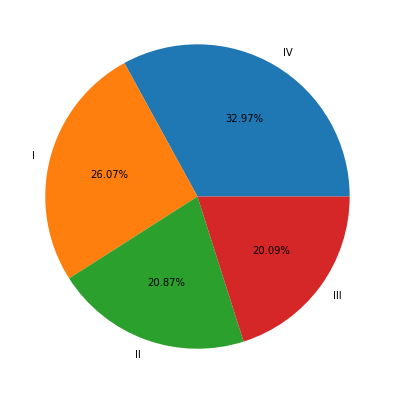

In [ ]:
# Creating a Pie chart to represent the amount of data in each category
pie = pd.value_counts(df['Kategori']).tolist()
plt.figure(figsize = (7,7))
plt.pie(x = pie, labels = ["IV", "I", "II", "III"], autopct='%.2f%%')